In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

Se cargan los datasets y se agrega la columna "stay (in days)" al dataframe con los datos de test, la cual en este caso es la columna objetivo a predecir

In [2]:
df_test=pd.read_csv("..\datasets_original\hospitalizaciones_test.csv",sep=",")
df_train=pd.read_csv("..\datasets_original\hospitalizaciones_train.csv",sep=",")
df_test["Stay (in days)"]=np.nan


En la columna "stay (in days)" del dataset de testeo, los valores menores o iguales a 8 dias se reemplazan por 0, y el resto por 1

In [3]:
df_train['Stay (in days)'] = np.where(df_train['Stay (in days)']<=8, 0, 1)

Se revisa que no haya valores nulos

In [4]:
print(df_train.isna().sum())

Available Extra Rooms in Hospital    0
Department                           0
Ward_Facility_Code                   0
doctor_name                          0
staff_available                      0
patientid                            0
Age                                  0
gender                               0
Type of Admission                    0
Severity of Illness                  0
health_conditions                    0
Visitors with Patient                0
Insurance                            0
Admission_Deposit                    0
Stay (in days)                       0
dtype: int64


In [5]:
print(df_test.isna().sum())

Available Extra Rooms in Hospital        0
Department                               0
Ward_Facility_Code                       0
doctor_name                              0
staff_available                          0
patientid                                0
Age                                      0
gender                                   0
Type of Admission                        0
Severity of Illness                      0
health_conditions                        0
Visitors with Patient                    0
Insurance                                0
Admission_Deposit                        0
Stay (in days)                       90000
dtype: int64


Tambien se reviso que no haya valores erroneos en las columnas y se evalua el tipo de datos

In [6]:
for i in range (15):
 print(df_train[df_train.columns[i]].unique())

[ 4  2  7  3  5 10  6  1 21  8 11 13  9 14 24  0 12 20]
['gynecology' 'anesthesia' 'TB & Chest disease' 'radiotherapy' 'surgery']
['D' 'B' 'E' 'F' 'A' 'C']
['Dr Sophia' 'Dr Olivia' 'Dr Mark' 'Dr John' 'Dr Sarah' 'Dr Sam'
 'Dr Nathan' 'Dr Simon' 'Dr Isaac']
[ 0  2  8  7 10  5  9  3  6  4  1]
[33070 34808 44577 ... 40881 51342 63598]
['41-50' '31-40' '21-30' '71-80' '11-20' '51-60' '61-70' '81-90' '91-100'
 '0-10']
['Female' 'Male' 'Other']
['Trauma' 'Urgent' 'Emergency']
['Extreme' 'Minor' 'Moderate']
['Diabetes' 'Heart disease' 'None' 'Other' 'Asthama' 'High Blood Pressure']
[ 4  2  3 11  9  6  8 12  5  1 14  7 13 10 22 18  0 16 20 21 19 23 15 24
 17 30 32 25]
['Yes' 'No']
[2966.408696 3554.835677 5624.733654 ... 3816.99421  3841.577491
 4329.046412]
[0 1]


In [7]:
for i in range (15):
 print(df_test[df_test.columns[i]].unique())

[ 3  2  4  5  1  9  6 10 13 11 24 20  7 14 12  0 21  8]
['gynecology' 'TB & Chest disease' 'radiotherapy' 'anesthesia' 'surgery']
['F' 'E' 'A' 'D' 'B' 'C']
['Dr Olivia' 'Dr John' 'Dr Sam' 'Dr Sarah' 'Dr Sophia' 'Dr Nathan'
 'Dr Mark' 'Dr Isaac' 'Dr Simon']
[10  4  7  1  6  5  8  0  9  3  2]
[  2858  65657  45598 ...  75642 118184  33937]
['21-30' '51-60' '71-80' '41-50' '31-40' '0-10' '61-70' '11-20' '81-90'
 '91-100']
['Female' 'Other' 'Male']
['Trauma' 'Urgent' 'Emergency']
['Moderate' 'Extreme' 'Minor']
['Other' 'Asthama' 'None' 'Diabetes' 'Heart disease' 'High Blood Pressure']
[ 2  3  4  8  6 13 14  5  9  1 10  7 12 23 11 19 22  0 17 32 15 24 18 16
 20 21 25 30]
['No' 'Yes']
[4749.640225 4122.261324 5459.067882 ... 5456.930075 4694.127772
 4713.868519]
[nan]


Al evaluar si hay valores duplicados no se encuentra ninguno

In [8]:
print("duplicados en df_test: ",len(df_test)-len(df_test.drop_duplicates()))
print("duplicados en df_train: ",len(df_train)-len(df_train.drop_duplicates()))

duplicados en df_test:  0
duplicados en df_train:  0


Para convertir las variables categoricas a numeros se utiliza OneHotEncoder, excepto en las columnas 'Admission_Deposit','patientid',"Stay (in days)" que por el tipo de dato que presentan no es necesario.

In [9]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(drop='first', sparse=False)

onehot = enc.fit_transform(df_train.drop(['Admission_Deposit','patientid',"Stay (in days)"], axis=1))
onehot = pd.DataFrame(onehot, columns=enc.get_feature_names(df_train.drop(['Admission_Deposit','patientid',"Stay (in days)"], axis=1).columns))
df_train = pd.concat([df_train[['Admission_Deposit','patientid',"Stay (in days)"]], onehot], axis=1)

#La transformacion se realiza en ambos dataset ya que ambos deben tener la misma cantidad de columnas y tipo de datos
onehot = enc.fit_transform(df_test.drop(['Admission_Deposit','patientid',"Stay (in days)"], axis=1))
onehot = pd.DataFrame(onehot, columns=enc.get_feature_names(df_test.drop(['Admission_Deposit','patientid',"Stay (in days)"], axis=1).columns))
df_test = pd.concat([df_test[['Admission_Deposit','patientid',"Stay (in days)"]], onehot], axis=1)

c:\Users\Lautaro\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
c:\Users\Lautaro\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Para elegir los mejores features se hace una lista con los que mayor correlacion tienen con la columna objetivo

In [10]:
list_features=df_train.corr().nlargest(10,"Stay (in days)")["Stay (in days)"].append(df_train.corr().nsmallest(10,"Stay (in days)")["Stay (in days)"]*-1)
print(list_features.sort_values(ascending=False))

Stay (in days)                         1.000000
doctor_name_Dr Mark                    0.246904
Department_anesthesia                  0.242282
Department_gynecology                  0.230424
gender_Male                            0.184325
Age_61-70                              0.184272
Age_51-60                              0.165409
Age_71-80                              0.153605
Age_31-40                              0.140341
Ward_Facility_Code_E                   0.138988
Ward_Facility_Code_F                   0.108095
Age_81-90                              0.100105
doctor_name_Dr John                    0.099091
Age_41-50                              0.092119
Ward_Facility_Code_D                   0.081017
doctor_name_Dr Nathan                  0.077513
doctor_name_Dr Olivia                  0.077157
Available Extra Rooms in Hospital_4    0.066835
doctor_name_Dr Sarah                   0.065817
Ward_Facility_Code_B                   0.064377
Name: Stay (in days), dtype: float64


C:\Users\Lautaro\AppData\Local\Temp\ipykernel_14784\3519889219.py:1: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  list_features=df_train.corr().nlargest(10,"Stay (in days)")["Stay (in days)"].append(df_train.corr().nsmallest(10,"Stay (in days)")["Stay (in days)"]*-1)


Se mantienen en el dataset solo las columnas con las que se va a trabajar

In [11]:
list_features=list_features.nlargest(10).index
df_train=df_train[list_features]
df_test=df_test[list_features]


En el siguiente grafico se pueden ver con mejor claridad las correlaciones

<AxesSubplot: >

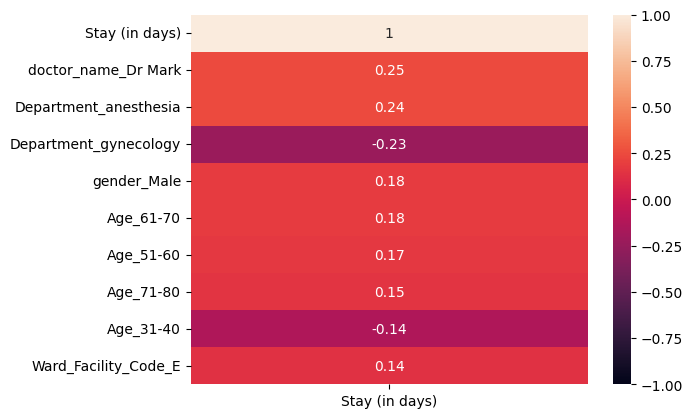

In [12]:
sns.heatmap(df_train.corr()[['Stay (in days)']],annot=True,vmin = -1, vmax = +1)

Por ultimo se guardan los dataset modificados para cargarlos en el archivo donde se utilizara el modelo

In [13]:
df_train.to_csv("df_train_mod.csv",index=False)
df_test.to_csv("df_test_mod.csv",index=False)